In [29]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import tensorflow as tf


In [12]:
IMG_WIDTH=200
IMG_HEIGHT=200
batch_size=4

train_dir = r'C:\data\CV\Intel_Images\seg_train\seg_train'
test_dir =  r'C:\data\CV\Intel_Images\seg_pred\seg_pred'
val_dir =  r'C:\data\CV\Intel_Images\seg_test\seg_test'

In [9]:
import matplotlib.image as mpimg
from  matplotlib import pyplot as plt
%matplotlib inline

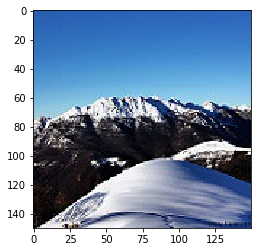

In [10]:

test_image=r'C:\data\CV\Intel_Images\seg_train\seg_train\mountain\414.jpg'

img=mpimg.imread(test_image)
plt.imshow(img)

In [43]:

image_gen_train = ImageDataGenerator(rescale=1./255, 
                                     zoom_range=0.2, 
                                     rotation_range=65,
                                     shear_range=0.09,
                                     horizontal_flip=True,
                                     vertical_flip=True)


In [44]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='sparse')

Found 14034 images belonging to 6 classes.


In [45]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='sparse')

Found 3000 images belonging to 6 classes.


In [46]:
train_data_gen.class_indices.keys()

dict_keys(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'])

In [47]:
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(200, 200, 3)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(6)])



In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 99, 99, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 49, 49, 64)        18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 153664)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 921990    
Total params: 941,382
Trainable params: 941,382
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [50]:

history = model.fit(train_data_gen,steps_per_epoch=len(train_data_gen)//batch_size, validation_data=val_data_gen, epochs=2)


Train for 877 steps, validate for 750 steps
Epoch 1/2
877/877 [==============================] - 149s 170ms/step - loss: 2.7023 - accuracy: 0.1676 - val_loss: 1.7918 - val_accuracy: 0.1750
Epoch 2/2
877/877 [==============================] - 147s 168ms/step - loss: 1.7918 - accuracy: 0.1787 - val_loss: 1.7918 - val_accuracy: 0.1750
